In [1]:
from amacrine_color_schema import *
import matplotlib.pyplot as plt

Connecting sstrauss@172.25.240.205:3306


Fetch data

In [2]:
key_chirp_g = {
                'experimenter': 'Franke',
                'stim_id': 5,
                'preprocess_param_set_id': 1,
                'resample_f_id': 3
            }

key_chirp_l = {
                'experimenter': 'Franke',
                'stim_id': 6,
                'preprocess_param_set_id': 1,
                'resample_f_id': 3
            }

In [3]:
bc_global = (SummarySnippets() & key_chirp_g).fetch()
bc_local = (SummarySnippets() & key_chirp_l).fetch()

assert len(bc_global) == 21
assert len(bc_local) == 21

Unravel data

In [4]:
columns_final = ['experimenter', 'date', 'exp_num', 
                 'field_id', 'roi', 'time_bin_global_chirp', 'global_chirp']
global_df = pd.DataFrame(columns = columns_final)

for i in range(21):

    columns = bc_global[i]['condition_average_strs'].split()
    data_df = pd.DataFrame(columns=columns)
    data_stack = bc_global[i]['condition_average_frame']
    data_df = pd.concat([data_df, pd.DataFrame(data_stack, columns=columns)])
    data_df = data_df.astype({'roi_ids': 'int32'})
    data_df = data_df.rename(
        columns={'roi_ids': 'rois', 'time_bin': 'time_bin_chirp', 'preprocess_snippets': 'chirp'})
    grouped_df = data_df.groupby(['rois', 'rois'])

    for index, group in grouped_df:  # code from Sarah's notebooks for normalizing the chirp
        current_roi = index[0]
        current_bin = group['time_bin_chirp'].values
        current_chirp = group['chirp'].values

        current_data = {'experimenter': bc_global[i][0],
                        'date': bc_global[i][1],
                        'exp_num': bc_global[i][2],
                        'field_id': bc_global[i][3],
                        'roi': current_roi,
                        'time_bin_global_chirp': current_bin,
                        'global_chirp': current_chirp}
        global_df = pd.concat([global_df, pd.DataFrame([current_data], columns=columns_final)], ignore_index=True)

In [5]:
columns_final = ['experimenter', 'date', 'exp_num', 
                 'field_id', 'roi', 'time_bin_local_chirp', 'local_chirp']
local_df = pd.DataFrame(columns = columns_final)

for i in range(21):

    columns = bc_local[i]['condition_average_strs'].split()
    data_df = pd.DataFrame(columns=columns)
    data_stack = bc_local[i]['condition_average_frame']
    data_df = pd.concat([data_df, pd.DataFrame(data_stack, columns=columns)])
    data_df = data_df.astype({'roi_ids': 'int32'})
    data_df = data_df.rename(
        columns={'roi_ids': 'rois', 'time_bin': 'time_bin_chirp', 'preprocess_snippets': 'chirp'})
    grouped_df = data_df.groupby(['rois', 'rois'])

    for index, group in grouped_df:  # code from Sarah's notebooks for normalizing the chirp
        current_roi = index[0]
        current_bin = group['time_bin_chirp'].values
        current_chirp = group['chirp'].values

        current_data = {'experimenter': bc_local[i][0],
                        'date': bc_local[i][1],
                        'exp_num': bc_local[i][2],
                        'field_id': bc_local[i][3],
                        'roi': current_roi,
                        'time_bin_local_chirp': current_bin,
                        'local_chirp': current_chirp}
        local_df = pd.concat([local_df, pd.DataFrame([current_data], columns=columns_final)], ignore_index=True)

Merge & further process

In [6]:
match_on = ['experimenter', 'date', 'exp_num', 'field_id', 'roi']

bc_data = global_df.merge(local_df, how='inner', on=match_on)
assert len(bc_data) == len(local_df)

In [7]:
print(len(bc_data['local_chirp'].iloc[1237]))
print(bc_data['time_bin_local_chirp'].iloc[1237])
bc_data.at[1237, 'time_bin_local_chirp'] = bc_data['time_bin_local_chirp'].iloc[1237][0:-1]
bc_data.at[1237, 'local_chirp'] = bc_data['local_chirp'].iloc[1237][0:-1]
print(len(bc_data['local_chirp'].iloc[1237]))

332
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 1

In [8]:
referenceA = bc_data['time_bin_local_chirp'].iloc[0]
referenceB = bc_data['time_bin_global_chirp'].iloc[0]
assert np.all(referenceA == referenceB)

for index, row in bc_data.iterrows():
    assert np.all(referenceA == row['time_bin_local_chirp'])
    assert np.all(referenceB == row['time_bin_global_chirp'])

In [9]:
bc_data.rename({'local_chirp': 'local_chirp_snippets', 
                'global_chirp': 'global_chirp_snippets'}, axis=1, inplace=True)

drop = ['time_bin_local_chirp', 'time_bin_global_chirp']
bc_data = bc_data.drop(drop, axis = 1)

Load dataframe with labels and merge

In [10]:
X = pd.read_pickle('Data/BCs/Dataframes/control_data_gmm_pcaColor_3Components_labels.pkl')

In [11]:
match_on = ['date', 'exp_num', 'field_id', 'roi']

final = X.merge(bc_data, how='inner', on=match_on)
assert len(final) == len(X)

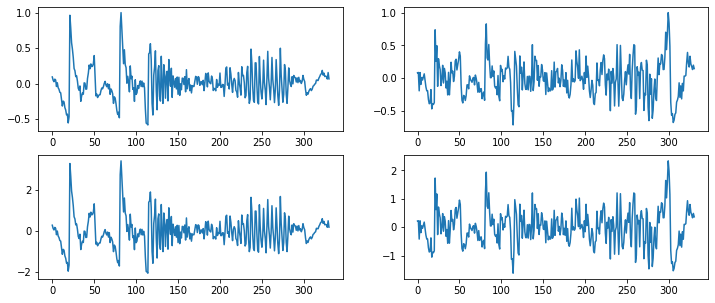

In [12]:
roi = 100
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(final['local_chirp'].iloc[roi])
plt.subplot(2,2,3)
plt.plot(final['local_chirp_snippets'].iloc[roi])
plt.subplot(2,2,2)
plt.plot(final['global_chirp'].iloc[roi])
plt.subplot(2,2,4)
plt.plot(final['global_chirp_snippets'].iloc[roi])
plt.show()

Calculate cluster averages

In [13]:
from clustering_utils import cluster_average

In [14]:
global_chirp = cluster_average(final, 'cluster ID (full)', 'global_chirp_snippets')
local_chirp = cluster_average(final, 'cluster ID (full)', 'local_chirp_snippets')

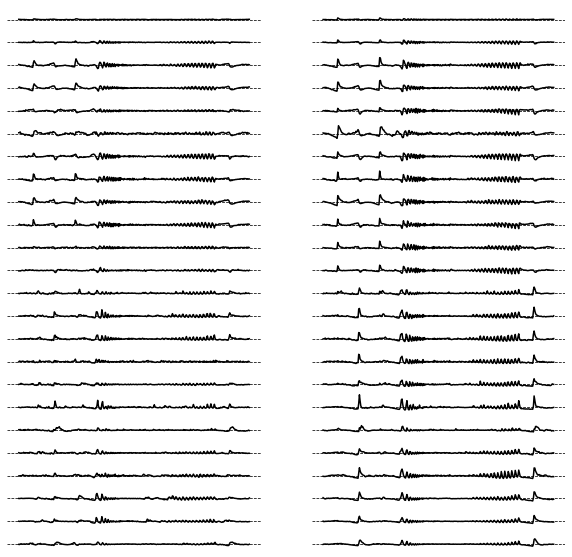

In [15]:
nb_clusters = local_chirp.shape[0]
fig, ax = plt.subplots(nb_clusters, 2, sharex='all', sharey='all', figsize=(10,10))
for current_cluster_ID in range(nb_clusters):
    my_ax = ax[current_cluster_ID, 0]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(global_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)

    my_ax = ax[current_cluster_ID, 1]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(local_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)
plt.show()

Save dataframe & arrays

In [16]:
#np.save('Data/BCs/Cluster Averages/snippets_global_chirp_avrg.npy', global_chirp)
#np.save('Data/BCs/Cluster Averages/snippets_local_chirp_avrg.npy', local_chirp)
#final.to_pickle('Data/BCs/Dataframes/snippets_control_data_gmm_pcaColor_3Components_labels.pkl')